In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

In [3]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [0]:
all_datasets = '\\Dataset_CSV\\all_datasets\\'
df = pd.read_csv('sha_simulated.csv')
dfn = pd.read_csv( 'sha_physical.csv')

In [57]:
df.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,runtime
0,IntelCorei97900X_DDR42666_2GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,2,DDR4,2666,10,20380
1,IntelCorei97900X_DDR42666_3GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,3,DDR4,2666,10,20380
2,IntelCorei97900X_DDR42666_4GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,4,DDR4,2666,10,20380
3,IntelCorei97900X_DDR42666_6GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,6,DDR4,2666,10,20380
4,IntelCorei97900X_DDR42666_7GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,7,DDR4,2666,10,20380


In [58]:
dfn.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,bus_speed,num-cpus,runtime
0,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,32,4,64,1,256,16,64,6,12288,16,DDR4,2666,4096,1,15577.5596
1,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,32,4,64,1,256,16,64,6,12288,16,DDR4,2666,4096,10,15415.2836
2,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,32,4,64,1,256,16,64,6,12288,16,DDR4,2666,4096,11,15420.6975
3,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,32,4,64,1,256,16,64,6,12288,16,DDR4,2666,4096,12,15477.0441
4,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,32,4,64,1,256,16,64,6,12288,16,DDR4,2666,4096,2,15895.5527


In [59]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'runtime'],
       dtype='object'),
 20,
 Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'bus_speed', 'num-cpus', 'runtime'],
       dtype='object'),
 21)

In [60]:
len(df),len(dfn)

(475, 52)

In [0]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [0]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [63]:
encoded_data_frame.head()

,arch,cpu-clock,isa_1,isa_2,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem-type_4,mem_clock,num-cpus,runtime
0,IntelCorei97900X_DDR42666_2GB,3.3,1,0,8,64,1,32,16,64,1,1024,16,64,10,16,2,1,0,0,0,2666,10,20380
1,IntelCorei97900X_DDR42666_3GB,3.3,1,0,8,64,1,32,16,64,1,1024,16,64,10,16,3,1,0,0,0,2666,10,20380
2,IntelCorei97900X_DDR42666_4GB,3.3,1,0,8,64,1,32,16,64,1,1024,16,64,10,16,4,1,0,0,0,2666,10,20380
3,IntelCorei97900X_DDR42666_6GB,3.3,1,0,8,64,1,32,16,64,1,1024,16,64,10,16,6,1,0,0,0,2666,10,20380
4,IntelCorei97900X_DDR42666_7GB,3.3,1,0,8,64,1,32,16,64,1,1024,16,64,10,16,7,1,0,0,0,2666,10,20380


In [64]:
encoded_data_frame_n.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,bus_speed,num-cpus,runtime
0,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,32,4,64,1,256,16,64,6,12288,16,1,0,2666,4096,1,15577.5596
1,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,32,4,64,1,256,16,64,6,12288,16,1,0,2666,4096,10,15415.2836
2,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,32,4,64,1,256,16,64,6,12288,16,1,0,2666,4096,11,15420.6975
3,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,32,4,64,1,256,16,64,6,12288,16,1,0,2666,4096,12,15477.0441
4,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,32,4,64,1,256,16,64,6,12288,16,1,0,2666,4096,2,15895.5527


In [65]:
encoded_data_frame.columns

Index(['arch', 'cpu-clock', 'isa_1', 'isa_2', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem-type_4', 'mem_clock', 'num-cpus',
       'runtime'],
      dtype='object')

In [66]:
encoded_data_frame_n.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem_clock', 'bus_speed', 'num-cpus', 'runtime'],
      dtype='object')

In [0]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch','bus_speed','mem-type_1','mem-type_2','isa_1'])

In [0]:
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1', 'isa_2'])

In [69]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads',
        'l1d_size', 'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads',
        'l2_size', 'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads',
        'l3_size', 'mem-size', 'mem_clock', 'num-cpus', 'runtime'],
       dtype='object'),
 Index(['cpu-clock', 'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads',
        'l1d_size', 'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads',
        'l2_size', 'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads',
        'l3_size', 'mem-size', 'mem_clock', 'num-cpus', 'runtime'],
       dtype='object'))

In [0]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [0]:
X_sim = total_data.drop(columns = ['runtime']).to_numpy()
Y_sim = total_data['runtime'].to_numpy()

In [0]:
X_phy = total_data_n.drop(columns = ['runtime']).to_numpy()
Y_phy = total_data_n['runtime'].to_numpy()

In [73]:
X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape

((475, 16), (52, 16), (475,), (52,))

In [74]:
Y_sim[:10], Y_phy[:10] 

(array([20380, 20380, 20380, 20380, 20380, 25903, 25903, 25903, 25903,
        25903]),
 array([15577.5596, 15415.2836, 15420.6975, 15477.0441, 15895.5527,
        15544.3322, 15402.8958, 15603.265 , 15820.4545, 15275.8791]))

In [75]:
# Separating Physical data to 10% and 90%
X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)
X_train_sim = np.append(X_sim, X_train_phy,axis = 0)
Y_train_sim = np.append(Y_sim, Y_train_phy,axis = 0)
print(X_train_sim.shape, Y_train_sim.shape, X_test_phy.shape, Y_test_phy.shape)

(5, 16) (47, 16) (5,) (47,)
(480, 16) (480,) (47, 16) (47,)


In [76]:
scaler_x = StandardScaler()
X_sim = scaler_x.fit_transform(X_sim)
X_train_phy = scaler_x.fit_transform(X_train_phy)
X_test_phy = scaler_x.fit_transform(X_test_phy)
scaler_y = StandardScaler()
Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))
Y_sim = scaler_y.fit_transform(Y_sim)
Y_test_phy = scaler_y.fit_transform(Y_test_phy)
Y_train_phy = scaler_y.fit_transform(Y_train_phy)
print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

(475, 16) (475, 1) (5, 16) (5, 1) (47, 16) (47, 1)


In [77]:
X_train = X_train_sim
X_test = X_test_phy
Y_train = Y_train_sim
Y_test = Y_test_phy
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((480, 16), (47, 16), (480,), (47, 1))

In [0]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

In [79]:
dnn_2 = Sequential()
dnn_2.add(Dense(64, input_dim = 16, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(1, activation='linear'))
print('Model : DNN 2', dnn_2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


In [80]:
dnn_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
dnn_2.fit(X_sim, Y_sim, epochs = 100, batch_size = 10, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.4770 - mean_absolute_error: 0.4770
Epoch 2/100
 - 0s - loss: 0.2147 - mean_absolute_error: 0.2147
Epoch 3/100
 - 0s - loss: 0.1487 - mean_absolute_error: 0.1487
Epoch 4/100
 - 0s - loss: 0.1314 - mean_absolute_error: 0.1314
Epoch 5/100
 - 0s - loss: 0.1157 - mean_absolute_error: 0.1157
Epoch 6/100
 - 0s - loss: 0.1130 - mean_absolute_error: 0.1130
Epoch 7/100
 - 0s - loss: 0.0930 - mean_absolute_error: 0.0930
Epoch 8/100
 - 0s - loss: 0.0978 - mean_absolute_error: 0.0978
Epoch 9/100
 - 0s - loss: 0.0878 - mean_absolute_error: 0.0878
Epoch 10/100
 - 0s - loss: 0.0911 - mean_absolute_error: 0.0911
Epoch 11/100
 - 0s - loss: 0.0673 - mean_absolute_error: 0.0673
Epoch 12/100
 - 0s - loss: 0.0635 - mean_absolute_error: 0.0635
Epoch 13/100
 - 0s - loss: 0.0526 - mean_absolute_error: 0.0526
Epoch 14/100
 - 0s - loss: 0.0568 - mean_absolute_error: 0.0568
Epoch 15/100
 - 0s - loss: 0.0573 - mean_absolute_error: 0.0573
Epoch 16/100
 - 0s - loss: 0.0535 - mean_absolute

In [81]:
# Freeze the layers except the last 2 dense layers
for layer in dnn_2.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in dnn_2.layers:
    print(layer, layer.trainable)

<keras.layers.core.Dense object at 0x7f8497bdccf8> False
<keras.layers.core.Dense object at 0x7f84a09ab8d0> False
<keras.layers.core.Dense object at 0x7f8488058b70> True
<keras.layers.core.Dense object at 0x7f8488035e10> True


In [82]:
dnn_2.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.5300 - mean_absolute_error: 0.5300
Epoch 2/100
 - 0s - loss: 0.2146 - mean_absolute_error: 0.2146
Epoch 3/100
 - 0s - loss: 0.2054 - mean_absolute_error: 0.2054
Epoch 4/100
 - 0s - loss: 0.2204 - mean_absolute_error: 0.2204
Epoch 5/100
 - 0s - loss: 0.1814 - mean_absolute_error: 0.1814
Epoch 6/100
 - 0s - loss: 0.2032 - mean_absolute_error: 0.2032
Epoch 7/100
 - 0s - loss: 0.1429 - mean_absolute_error: 0.1429
Epoch 8/100
 - 0s - loss: 0.1194 - mean_absolute_error: 0.1194
Epoch 9/100
 - 0s - loss: 0.1525 - mean_absolute_error: 0.1525
Epoch 10/100
 - 0s - loss: 0.1176 - mean_absolute_error: 0.1176
Epoch 11/100
 - 0s - loss: 0.1398 - mean_absolute_error: 0.1398
Epoch 12/100


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


 - 0s - loss: 0.1016 - mean_absolute_error: 0.1016
Epoch 13/100
 - 0s - loss: 0.1112 - mean_absolute_error: 0.1112
Epoch 14/100
 - 0s - loss: 0.1601 - mean_absolute_error: 0.1601
Epoch 15/100
 - 0s - loss: 0.1693 - mean_absolute_error: 0.1693
Epoch 16/100
 - 0s - loss: 0.1777 - mean_absolute_error: 0.1777
Epoch 17/100
 - 0s - loss: 0.1066 - mean_absolute_error: 0.1066
Epoch 18/100
 - 0s - loss: 0.0885 - mean_absolute_error: 0.0885
Epoch 19/100
 - 0s - loss: 0.0962 - mean_absolute_error: 0.0962
Epoch 20/100
 - 0s - loss: 0.0948 - mean_absolute_error: 0.0948
Epoch 21/100
 - 0s - loss: 0.1329 - mean_absolute_error: 0.1329
Epoch 22/100
 - 0s - loss: 0.0710 - mean_absolute_error: 0.0710
Epoch 23/100
 - 0s - loss: 0.1161 - mean_absolute_error: 0.1161
Epoch 24/100
 - 0s - loss: 0.1466 - mean_absolute_error: 0.1466
Epoch 25/100
 - 0s - loss: 0.1583 - mean_absolute_error: 0.1583
Epoch 26/100
 - 0s - loss: 0.0892 - mean_absolute_error: 0.0892
Epoch 27/100
 - 0s - loss: 0.1514 - mean_absolute_err

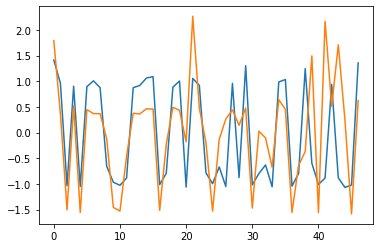

In [83]:
Y_pred = dnn_2.predict(X_test_phy)
plt.plot(Y_pred)
plt.plot(Y_test_phy)

MSE: 
 22266993.7893044

R2: 
 0.13663189387511754

MAPE: 
 0.16992731674845277


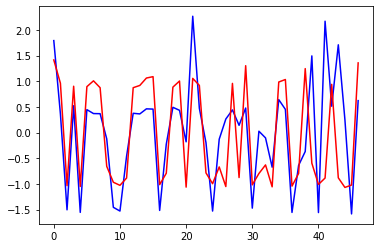

In [84]:
plt.figure()
plt.plot(Y_test_phy, 'b')
plt.plot(Y_pred, 'r')
Y_test_phy = scaler_y.inverse_transform(Y_test_phy)
Y_pred = scaler_y.inverse_transform(Y_pred)
r2_scores = (r2_score(Y_test_phy, Y_pred))
mse_scores = (mean_squared_error(Y_test_phy, Y_pred))
mape_scores = (absolute_percentage_error(Y_test_phy, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores[0])